In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('DATA/airline_tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

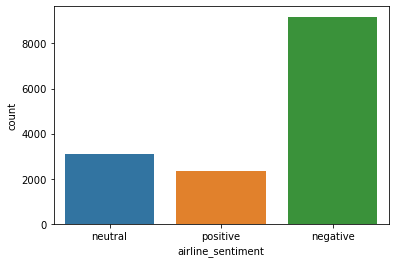

In [5]:
sns.countplot(data = df,x='airline_sentiment')

<AxesSubplot:xlabel='airline', ylabel='count'>

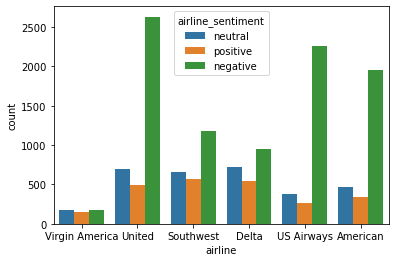

In [6]:
sns.countplot(data= df,x='airline',hue='airline_sentiment')

In [7]:
data=df[['airline_sentiment','text']]

In [14]:
X=data['text']

In [15]:
y=data['airline_sentiment']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf =TfidfVectorizer(stop_words='english')

In [20]:
tfidf.fit(X_test)

TfidfVectorizer(stop_words='english')

In [21]:
X_train_tfidf = tfidf.transform(X_train)

In [22]:
X_test_tfidf = tfidf.transform(X_test)

In [23]:
X_train_tfidf

<9808x7603 sparse matrix of type '<class 'numpy.float64'>'
	with 80083 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [28]:
from sklearn.svm import SVC,LinearSVC

In [29]:
rbf_svc = SVC()
rbf_svc.fit(X_train_tfidf,y_train)

SVC()

In [30]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [31]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [32]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

              precision    recall  f1-score   support

    negative       0.72      0.99      0.83      3085
     neutral       0.72      0.25      0.37       984
    positive       0.89      0.29      0.43       763

    accuracy                           0.73      4832
   macro avg       0.77      0.51      0.54      4832
weighted avg       0.74      0.73      0.67      4832



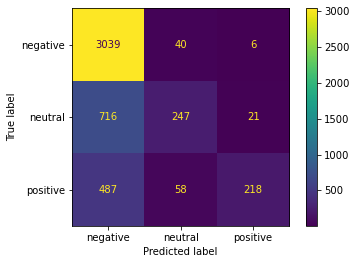

In [33]:
report(nb)

              precision    recall  f1-score   support

    negative       0.80      0.95      0.87      3085
     neutral       0.65      0.42      0.51       984
    positive       0.82      0.56      0.67       763

    accuracy                           0.78      4832
   macro avg       0.76      0.64      0.68      4832
weighted avg       0.77      0.78      0.76      4832



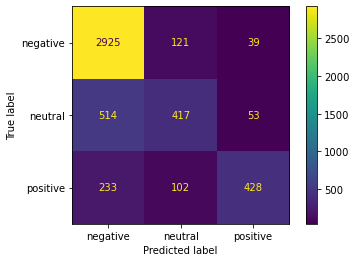

In [34]:
report(log_model)

              precision    recall  f1-score   support

    negative       0.78      0.96      0.86      3085
     neutral       0.70      0.35      0.47       984
    positive       0.84      0.56      0.67       763

    accuracy                           0.78      4832
   macro avg       0.77      0.63      0.67      4832
weighted avg       0.77      0.78      0.75      4832



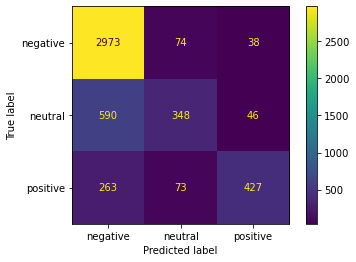

In [35]:
report(rbf_svc)

              precision    recall  f1-score   support

    negative       0.83      0.90      0.86      3085
     neutral       0.60      0.51      0.55       984
    positive       0.76      0.63      0.69       763

    accuracy                           0.78      4832
   macro avg       0.73      0.68      0.70      4832
weighted avg       0.77      0.78      0.77      4832



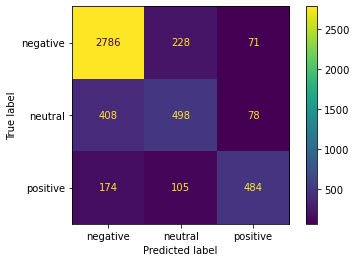

In [36]:
report(linear_svc)

In [37]:
from sklearn.pipeline import Pipeline

In [45]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [46]:
X

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [47]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [48]:
pipe.predict(['good flight'])

array(['positive'], dtype=object)

In [50]:
svc_prediction = pipe.predict(X_test)

In [51]:
print(classification_report(y_test,svc_prediction))

              precision    recall  f1-score   support

    negative       0.95      0.99      0.97      3085
     neutral       0.95      0.85      0.90       984
    positive       0.96      0.93      0.94       763

    accuracy                           0.95      4832
   macro avg       0.95      0.92      0.94      4832
weighted avg       0.95      0.95      0.95      4832

